In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mdtraj as md
import numpy as np

from rocketshp import config
from rocketshp.plot import display_trajectory
from loguru import logger

In [2]:
data_dir = config.RAW_DATA_DIR / "atlas"
meta_dir = config.RAW_DATA_DIR / "atlas_meta"

import glob

file_list = glob.glob(f"{data_dir}/*protein.zip")
protein_list = ["_".join(f.split("/")[-1].split("_")[:2]) for f in file_list]

In [3]:
traj = md.load_xtc(data_dir / "7w/7wab_A_prod_R1_fit.xtc", top=data_dir / "7w/7wab_A.pdb")
traj.center_coordinates()
traj = traj.superpose(traj, 0)

In [28]:
def slice_trajectory(traj, start=0, end=None, step=1):
    if end is not None:
        return traj[start:end:step]
    else:
        return traj[start::step]

slice_trajectory(traj, start=0, end=None, step=1)

<mdtraj.Trajectory with 10001 frames, 7372 atoms, 484 residues, and unitcells at 0x7f87601a4e90>

In [ ]:
def slice_trajectory_tensor(xyz, start, end, step=1):
    return xyz[start:end:step, :, :]

slice_trajectory_tensor(traj.xyz, 0, 100).shape

(100, 7372, 3)

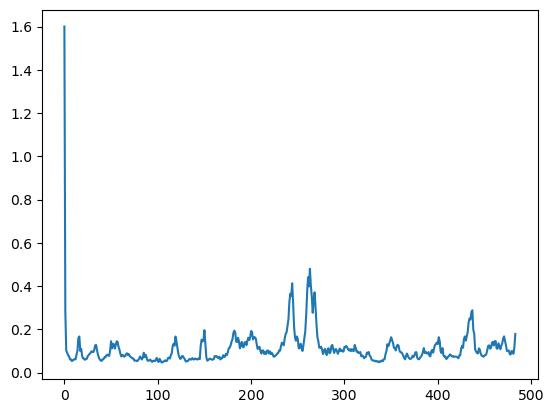

In [10]:
rmsf = md.rmsf(traj, traj, 0, atom_indices=traj.top.select("name CA"))
plt.plot(np.arange(len(rmsf)), rmsf); plt.show()

In [15]:
display_trajectory(slice_trajectory(traj, 0, 100))

NGLWidget(max_frame=99)